# Introduction to Data Science
## Homework 3

Student Name: Gina Holden

Student Netid: gh1407
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$$\text{MI} =  \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$
$$\text{by division of logs} = \sum_{y \in Y} \sum_{x \in X}p(x, y)(log\frac{p(x, y)}{p(x)} - log p(y)) $$
$$\text{by multiplication} =  \sum_{y \in Y} \sum_{x \in X}p(x, y)log\frac{p(x, y)}{p(x)} -  \sum_{y \in Y} \sum_{x \in X} p(x, y)  log (p(y))  $$

$$\text{by }p(x, y) = p(x)p(Y \mid X) \text{   } $$
$$=   \sum_{y \in Y} \sum_{x \in X} p(x)p(Y \mid X)log\frac{p(x)p(Y \mid X)}{p(x)} - \sum_{y \in Y} \sum_{x \in X}p(x, y)log(p(y)) $$

$$\text{cancel out p(x) terms } =   \sum_{y \in Y} \sum_{x \in X} p(x)p(Y \mid X)logp(Y \mid X) - \sum_{y \in Y} \sum_{x \in X}p(x, y)log(p(y)) $$

$$\text{seperate summations }  =     \sum_{x \in X} p(x)\sum_{y \in Y}p(Y \mid X)logp(Y \mid X) - \sum_{y \in Y} \sum_{x \in X}p(x, y)log(p(y))$$

$$\text{since (} \sum_{x \in X}p(x, y)=p(y)\text{)  } $$
$$=  \sum_{x \in X} p(x)\sum_{y \in Y}p(Y \mid X)logp(Y \mid X) -  \sum_{y \in Y} p( y)log(p(y)) $$

$$\text{by (}H(y)=-\sum_{y \in Y}p(y)log(p(y))\text{)  } $$ 
$$=  -\sum_{x \in X}p(x) H(Y \mid X) -  \sum_{y \in Y} p( y)log(p(y)) $$

$$\text{again by (}H(y)=-\sum_{y \in Y}p(y)log(p(y))\text{)   } $$
$$=  -\sum_{x \in X}p(x)H(Y \mid X = x) +  H(y) $$

$$\text{by } H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x) $$
$$= - H(Y \mid X)+  H(y) $$
$$=   H(y) - H(Y \mid X) $$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [2]:
import pandas as pd

feature_names = ["revenue", "outcalls", 
                                              "incalls", 
                                              "months",
                                             "eqpdays",
                                             "webcap",
                                             "marryyes",
                                             "travel",
                                             "pcown",
                                             "creditcd",
                                             "retcalls"]
all_names = feature_names + ["churndep"]
read_df = pd.read_csv("cell2cell_data.csv", names= all_names )

train_df = read_df.sample(frac=0.8)
test_df = read_df.loc[~read_df.index.isin(train_df.index)]


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Random sampling means the probability of being in the sample is independant of any feature variable or the target variable. To test this, you could create a new column in your dataframes test and train, that is 1 for train and 0 for test. You could call that column "in_sample". Then you combine the dataframes and run correlation for all the columns against "in_sample". A quick google search is telling me we can use `df[df.columns[1:]].corr()['in_sample'][:]` . What you would be looking for is all of the correlations to be pretty close to zero. Of course you could run a significance test on them as well if your colleague is not satisfied with eyeballing the numbers. 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [3]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(train_df.loc[:, train_df.columns != 'churndep'], train_df.churndep)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

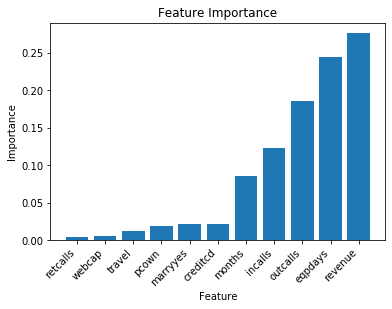

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

importances = model.feature_importances_
importance_df = pd.DataFrame({'feature':feature_names, 'importance':importances})
importance_df = importance_df.sort_values(by=['importance'])

plt.bar(importance_df.feature, importance_df.importance)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title("Feature Importance")

plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [5]:
importance_df
train_df.corr()['churndep']

revenue    -0.013694
outcalls   -0.041113
incalls    -0.044291
months      0.022388
eqpdays     0.113395
webcap     -0.070628
marryyes   -0.009112
travel     -0.005808
pcown      -0.000692
creditcd   -0.012500
retcalls    0.066634
churndep    1.000000
Name: churndep, dtype: float64

The most important features are revenue, eqpdays, and outcalls in that order.  

Revenue has a negative correlation.  The problem statement doesn't tell us too much about what revenue is, but if it is the amount of money the company has made off the customer, this correlation makes sense. If the company is making more money off the customer, the customer is probably paying too much, or incurring tons of fees, etc. It makes sense that customer would be likely to leave. 

Eqpdays has a positive correlation suggesting that the longer the customer has had equiptment, which is representative of their time with the company, the more likely they are to leave. This makes some sense because people that have recently joined probably joined for a reason - they thought they were getting the best deal, they were offered some promo, whatever. People are not likely to leave right away. But over time they can become dissatisfied. 

outcalls has a negative correlation. I'm not sure what to make of this other than people that are not making that many calls are more likely to churn. Maybe your company doesn't have good plans for these people. Maybe they joined up thinking they were going to make more calls and justify the price. Maybe your company needs to look into better pay-by-use plans to help retain these lower volume customers. 


6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [6]:
from sklearn import metrics

test_df_feature_data = test_df.loc[:, test_df.columns != 'churndep']
y_pred_test = model.predict(test_df_feature_data)
y_actual_test = test_df.churndep
print("Test Accuracy:",metrics.accuracy_score(y_actual_test, y_pred_test))

train_df_feature_data = train_df.loc[:, train_df.columns != 'churndep']
y_pred_train = model.predict(train_df_feature_data)
y_actual_train = train_df.churndep
print("Training Accuracy:",metrics.accuracy_score(y_actual_train, y_pred_train))

Test Accuracy: 0.5299799297541394
Training Accuracy: 0.9998745570295104


The training accuracy is very high compared to test accuracy. This is because we left all the defautls on the decision tree and didn't limit the tree from overfitting.  

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [13]:

import math

max_samples_split = len(train_df.index)
current_max = math.floor(max_samples_split/2)
min_samples_split = [current_max]
for i in range(0,9):
    new_split = current_max /2
    min_samples_split.append(math.floor(new_split))
    current_max = new_split

max_samples_leaf = math.floor(len(train_df.index)/4)
current_max = max_samples_leaf
min_samples_leaf = [current_max]
for i in range(0,9):
    new_leaf = current_max /2
    min_samples_leaf.append(math.floor(new_leaf))
    current_max = new_leaf

2\. Explain in words your reasoning for choosing the above ranges.

For min samples split, we know the maximum minimum samples is the total number of observations in the dataset. For example, that would mean you could only do one split if you set min_samples_split equal to the number of observations. So I started with half the observations and divided by two repeatedly in order to get more tests of the lower numbers since we have seen from experience that the optimal combination is not likely to be in the very high mins. 

For min_samples_leaf, I did similar though the difference is that you can't start with number of observations as the first parameter becasue then you wouldn't be able to do any splits at all. So I started with observations/2. After one run through, I found the accuracy of min_leaf of observations/2 is always .5 and doesn't improve with any combination of max samples split, so I then bumped that down to start at observations/4 in order to get a little more interesting data and readable graph. 

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy_df = pd.DataFrame(columns=['min_split', 'min_leaf', 'accuracy'])
train_df_feature_data = train_df.loc[:, train_df.columns != 'churndep']

for min_split in min_samples_split:
    for min_leaf in min_samples_leaf:
        model = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_split, min_samples_leaf=min_leaf)
        model.fit(train_df_feature_data, train_df.churndep)    
        test_df_feature_data = test_df.loc[:, test_df.columns != 'churndep']
        y_pred_test = model.predict(test_df_feature_data)
        y_actual_test = test_df.churndep
        accuracy = metrics.accuracy_score(y_actual_test, y_pred_test)
        accuracy_df.loc[len(accuracy_df)] = [min_split, min_leaf, accuracy]


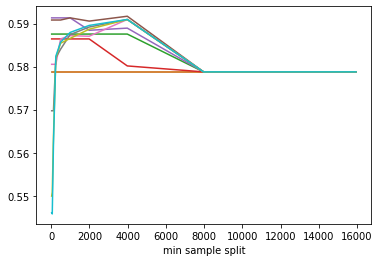

<Figure size 288x288 with 0 Axes>

In [15]:
for min_leaf in min_samples_leaf:
    plt.plot( accuracy_df.loc[accuracy_df.min_leaf == min_leaf].min_split, accuracy_df.loc[accuracy_df.min_leaf == min_leaf].accuracy, marker='')
plt.xlabel('min sample split')
plt.figure(figsize=(4,4))
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [19]:
best_accuracy_row = accuracy_df.loc[accuracy_df['accuracy'].idxmax()]
print(best_accuracy_row)

min_split    3985.000000
min_leaf      249.000000
accuracy        0.591696
Name: 25, dtype: float64


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

In industries that are oversaturated, like cell phone providers, it is very expensive to aquire new customers, and often worth an investment to try to keep the ones you have. So since our strongest predictor is revenue, there could be a cost tradeoff done to see if it's worth giving someone who you are making a lot of money off of (and hence high revenue) a bit of a better contract (lowering revenue) in hopes that that will make them stay longer. The business may have other opinions, but my naive assessment is that as long as your revenue is still positive with the new contract, you are still improving the outlook because that customer would be giving you zero revenue if they churn. The thing to consider might be uncertainty though. If we are only predicting churn at 60% accuracy, we could be lowering our revenue for no reason 40% of the time if we give out these offers to everyone. So maybe you get your model to give you probabilities and rankings so you can give your new contract offer to only those that we are most confident will churn. 